In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

In [2]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        obj = data[data.find('{') : data.rfind('}')+1]
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data
    return []

In [3]:
file_dir = os.getcwd() + "/Assignment02/"
file_neg = os.listdir(file_dir + "negative")
file_pos = os.listdir(file_dir + "positive")
file_unclassified = os.listdir(file_dir + "unclassified")


In [ ]:
with open(file_dir + "/negative/1361888.js") as dataFile:
        data = dataFile.read()
        print(data)
#         obj = data[data.find('{') : data.rfind('}')+1]
#         obj = obj.replace(")", "")
#         jsonObj = json.loads(obj)
#         waveform_data = pd.DataFrame(jsonObj['data']) 
# waveform_data

In [ ]:
# count = 0
for file in file_neg:
    count+=1
#     print(count)
#     print(file)
    waveform = load_waveform(file_dir + "/negative/" + file)

    fig = plt.figure()
    fig.set_figwidth(20)     

    plt_1 = plt.subplot(1, 2, 1)    
    plt.plot(waveform[2], waveform[0], 'o')

In [ ]:
count = 0
for file in file_pos:
    count+=1
    print(count)
    print(file)
    waveform = load_waveform(file_dir + "/positive/" + file)

    fig = plt.figure()
    fig.set_figwidth(20)     

    plt_1 = plt.subplot(1, 2, 1)    
    plt.plot(waveform[2], waveform[0], 'o')

In [ ]:
count = 0
for file in file_unclassified:
    count+=1
    print(count)
    print(file)
    waveform = load_waveform(file_dir + "/unclassified/" + file)

    fig = plt.figure()
    fig.set_figwidth(20)     

    plt_1 = plt.subplot(1, 2, 1)    
    plt.plot(waveform[2], waveform[0], 'o')

In [4]:
df_neg = load_waveform(file_dir + "negative/" + file_neg[0])
df = df_neg.rename(
    columns={0: "peak_amplitude", 1: "integral", 2: "phase_angle",3 : "cycle_number", 4 : "rise_time",5: "pulse_width"}).reset_index(drop=True)
df

,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width
0,23.50,18998,130,25705,0,0
1,22.25,56717,132,25705,0,0
2,23.00,3915,132,25705,347,0
3,24.25,19811,133,25705,0,0
4,25.25,8514,134,25705,0,0
...,...,...,...,...,...,...
16161,23.25,42394,199,26197,0,0
16162,25.50,18551,202,26197,0,0
16163,23.75,11732,203,26197,0,0
16164,24.75,23589,203,26197,0,0


In [ ]:
# Load negative dataframe
df_neg = load_waveform(file_dir + "negative/" + file_neg[0])
df_neg["type"] = "neg"

# # Load positive dataframe
# df_pos = load_waveform(file_dir + "positive/" + file_pos[0])
# df_pos["type"] = "pos"


In [ ]:
df = df_neg.rename(
    columns={0: "peak_amplitude", 1: "integral", 2: "phase_angle",3 : "cycle_number", 4 : "rise_time",5: "pulse_width"}).reset_index(drop=True)
df

In [ ]:
# df = pd.concat([df_pos, df_neg]).rename(
#     columns={0: "peak_amplitude", 1: "integral", 2: "phase_angle",3 : "cycle_number", 4 : "rise_time",5: "pulse_width"}).reset_index(drop=True)
# df

In [ ]:
# Made another df to not accidentally mess up the original
df = df.drop('type', axis=1)
df

In [ ]:
# (100 - (count/len(df_neg))*100)
len(df_neg) - count

In [ ]:
count = 0
for i in range(len(df)):
    if(df["peak_amplitude"][i] > 0 and df["type"][i] == "neg"):
        count += 1
print(count)

In [ ]:
colours = {"pos" : "green", "neg" : "red"}

In [ ]:
# X represents the 360 degrees and 
# y represents the amplitude(in dBmV for transient earth voltage measurements) for each discharge event
plt.figure(figsize=(20,30))
plt.scatter(df["phase_angle"], df["peak_amplitude"], c=df['type'].map(colours))

plt.show()

In [5]:
import hdbscan
clusterer = hdbscan.HDBSCAN(gen_min_span_tree=True)
clusterer.fit(df)

HDBSCAN(gen_min_span_tree=True)

In [6]:
# Samples in the same cluster get assigned the same number
clusterer.labels_

array([10,  9, 10, ..., 10, 10, 10], dtype=int64)

In [7]:
# This tells us that we have 11 clusters
clusterer.labels_.max()

10

In [8]:
#HDBScan is noise aware so noise will get assigned 0 and non-noise will get assigned 1
clusterer.probabilities_

array([1., 1., 1., ..., 1., 1., 1.])

In [9]:
count = 0
for i in clusterer.probabilities_:
    if i == 0:
        count +=1
        print(i)
print(count)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
72


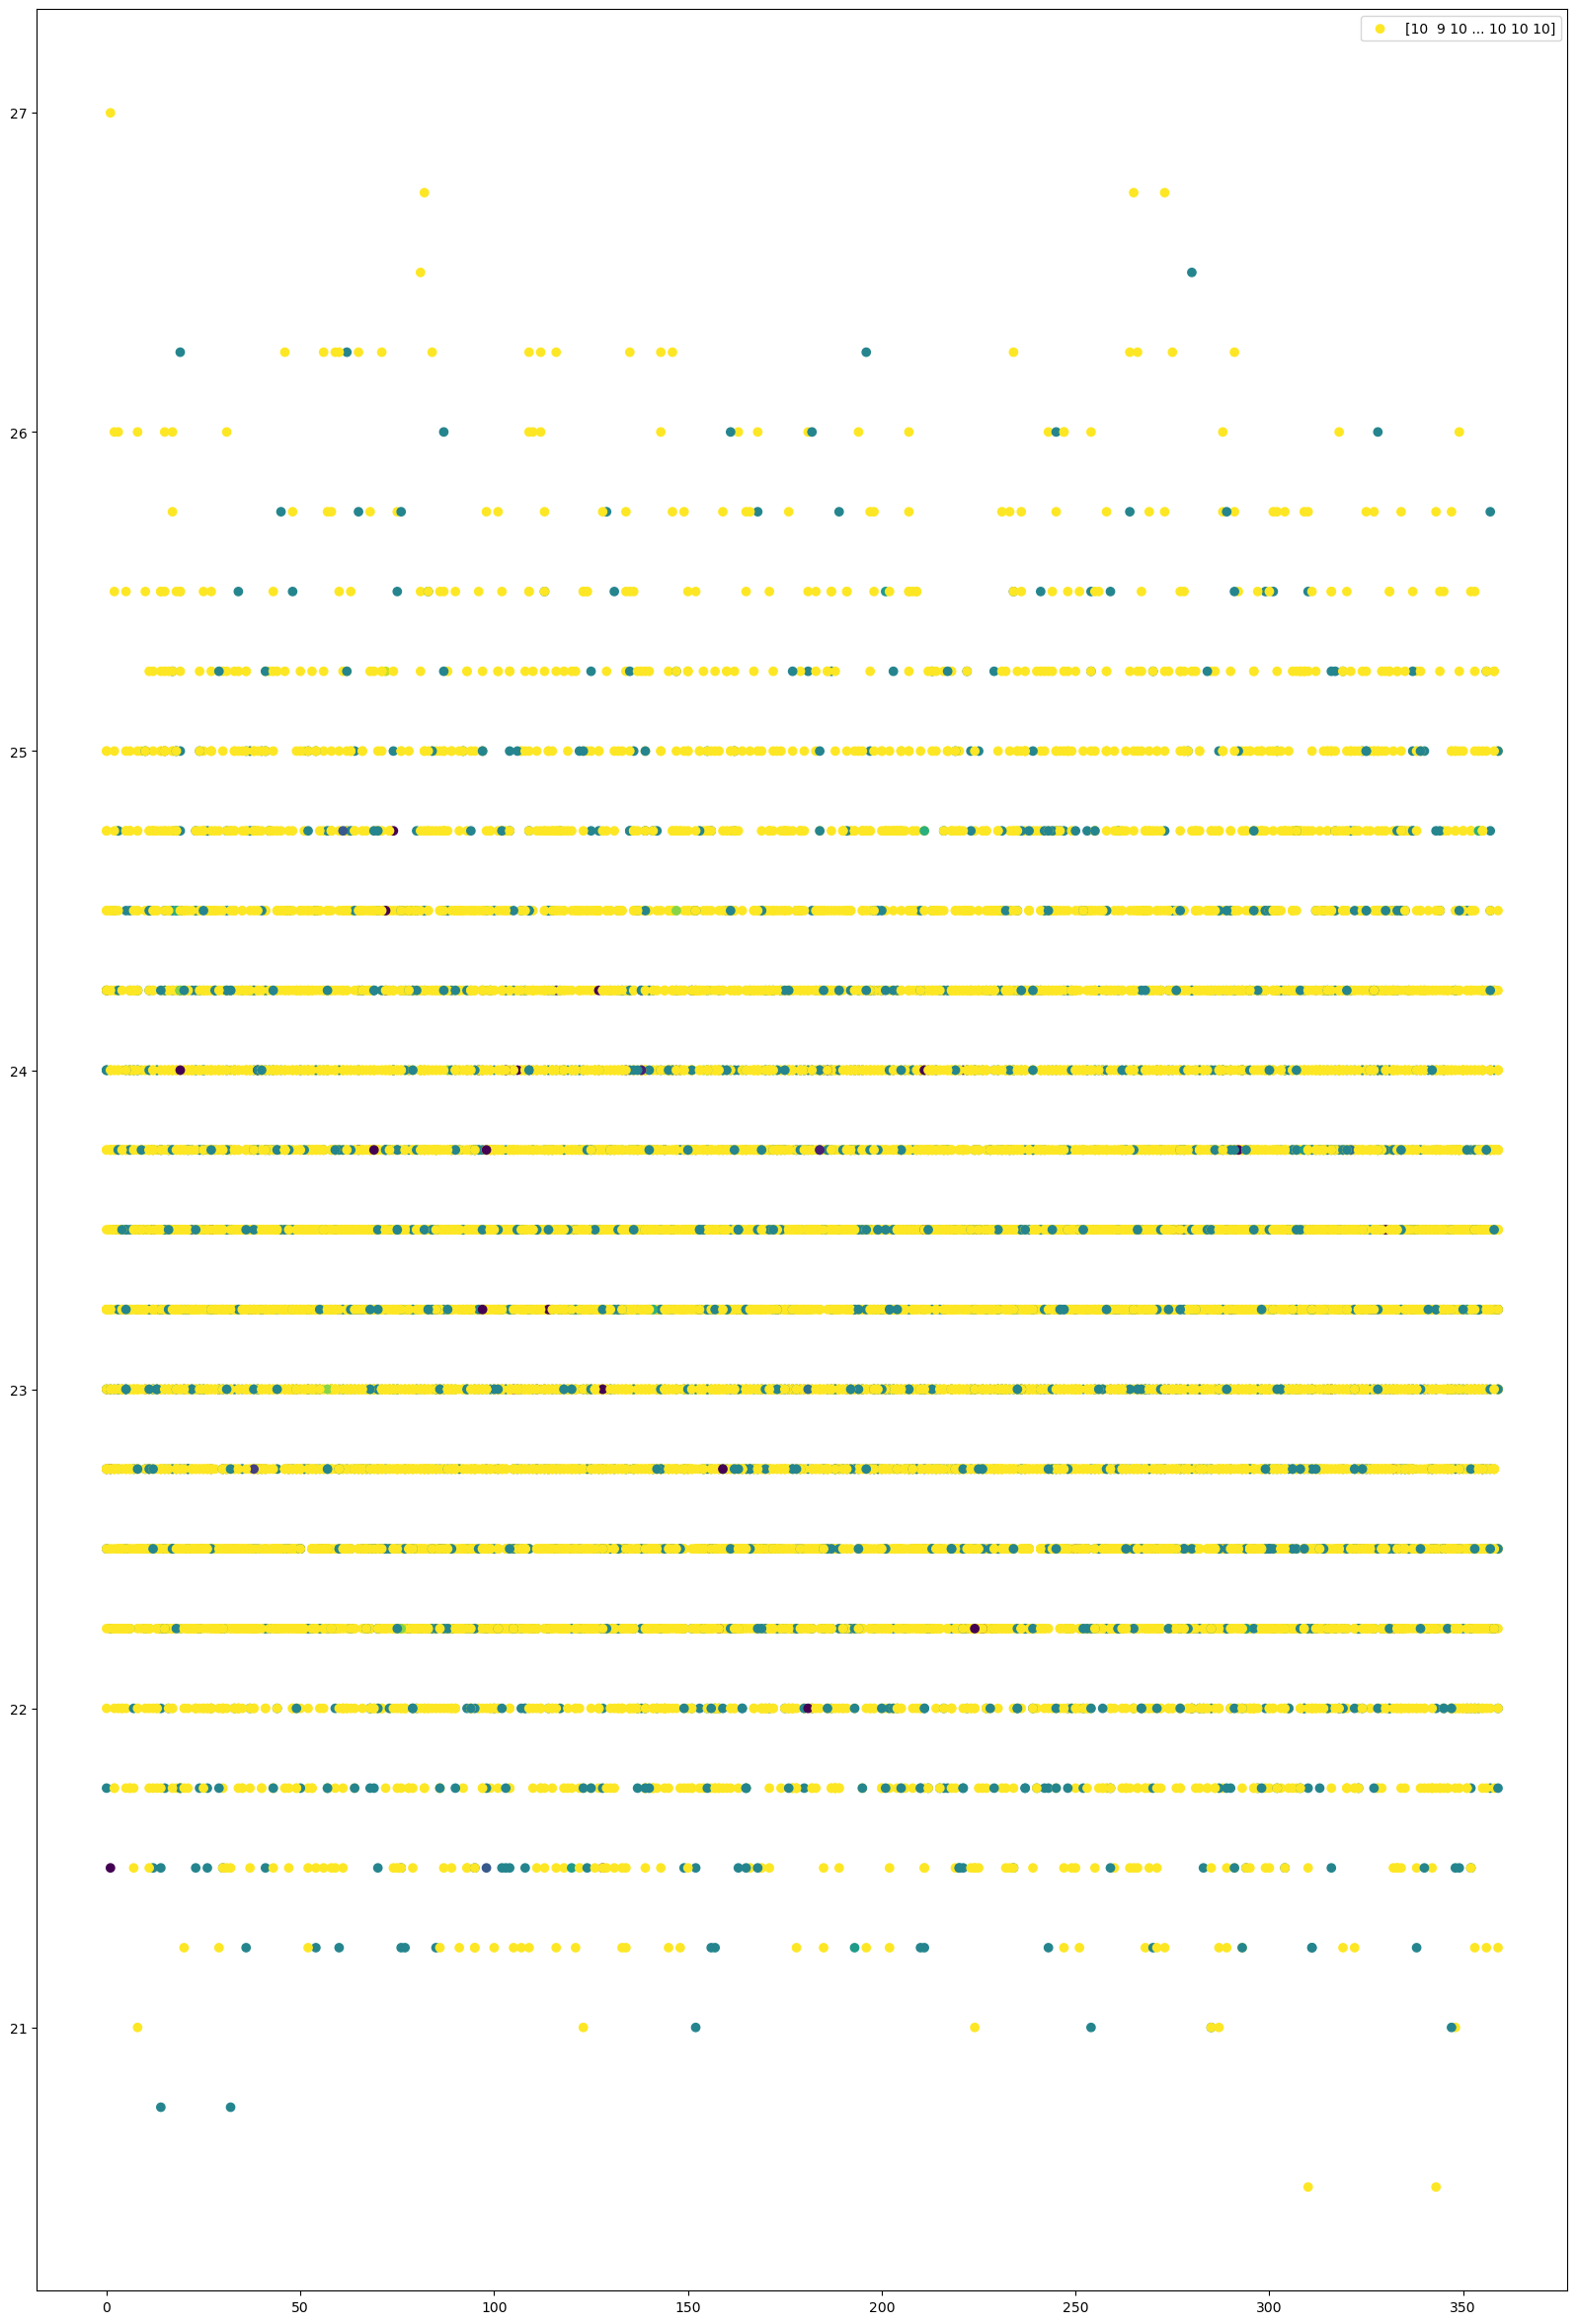

In [10]:
plt.figure(figsize=(20,30))
plt.scatter(df['phase_angle'], df['peak_amplitude'],c=clusterer.labels_, cmap='viridis', label=clusterer.labels_)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
colors = plt.cm.viridis.colors[:len(unique_labels)]
legend_handles = [plt.Line2D([], [], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(unique_labels, colors)]
plt.legend()
plt.show()

In [ ]:
# This kills my kernel, whoever can run it please do so
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

C:\Users\melty\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\melty\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

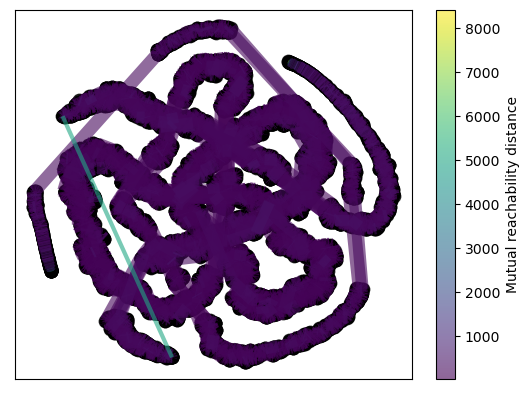

In [11]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

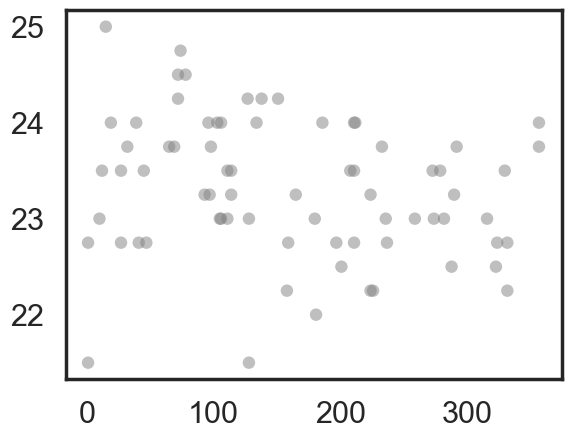

In [12]:
# Plotting the noise
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette(n_colors=11)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

noise_points = (clusterer.labels_ == -1)
plt.scatter(df.loc[noise_points, 'phase_angle'], df.loc[noise_points, 'peak_amplitude'],
            c=[cluster_colors[i] for i in range(len(cluster_colors)) if noise_points[i]],
            **plot_kwds)

In [ ]:
num_noise_points = noise_points.sum()
print("Number of noise points:", num_noise_points)

In [ ]:
df.shape

In [ ]:
df[15972:15974]